In [0]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt

import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

(200, 2)


NameError: ignored

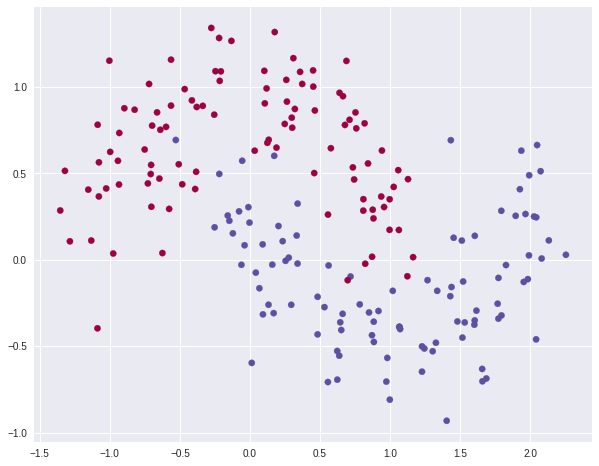

In [13]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s =40, c=y,cmap=plt.cm.Spectral)
print X.shape

In [0]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

NameError: ignored

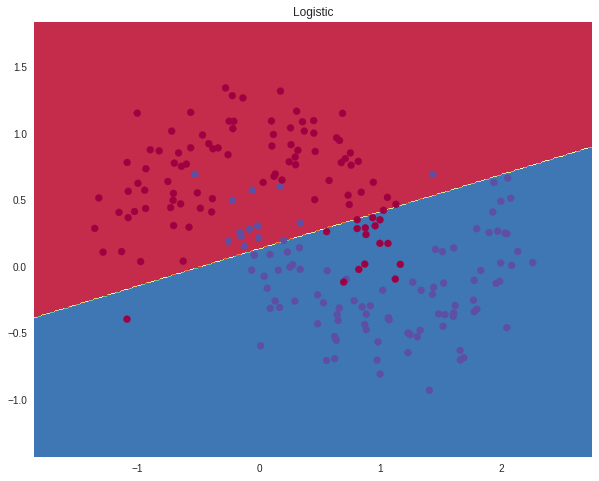

In [15]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X,y)
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic")
print x

In [18]:
num_examples = len(X)
y

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [0]:
nn_input_dim = 2
nn_output_dim = 2
epsilon = 0.01
reg_lambda = 0.01


In [0]:
def calculate_loss(model):
    w1,b1,w2,b2 = model['w1'],model['b1'],model['w2'],model['b2']
    #print w1
    z1 = X.dot(w1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(w2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis = 1,keepdims=True)
    correct_probs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(correct_probs)
    data_loss+= reg_lambda/2 *(np.sum(np.square(w1)))
    return 1./num_examples * data_loss

In [0]:
def predict(model,X):
    w1,b1,w2,b2 = model['w1'],model['b1'],model['w2'],model['b2']
    z1 = X.dot(w1) +b1
    a1 = np.tanh(z1)
    z2 = a1.dot(w2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores/np.sum(exp_scores,axis=1,keepdims=True)
    return np.argmax(probs,axis=1)

In [0]:
def build_model(nn_hdim,num_passes = 2,print_loss=False):
    np.random.seed(0)
    w1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    print w1.shape
    if print_loss:
      print w1
    b1 = np.zeros((1,nn_hdim))
    print b1.shape
    w2 = np.random.randn( nn_hdim,nn_input_dim) / np.sqrt(nn_hdim)
    print w2.shape
    b2 = np.zeros((1,nn_output_dim))

    print b2.shape
    model={}
    print X.shape
    for i in xrange(0,num_passes):
        z1 = X.dot(w1)
        print z1
        z1 = 
        
        a1 = np.tanh(z1)
        z2 = a1.dot(w2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores/np.sum(exp_scores,axis=1,keepdims=True)
        
        delta3 = probs
        delta3[range(num_examples),y] -=1
        dw2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3,axis=0,keepdims=True)
        delta2 = delta3.dot(w2.T) *(1-np.power(a1,2))
        dw1 = np.dot(X.T,delta2)
        db1 = np.sum(delta2,axis =0)
        
        dw2+= reg_lambda*w2
        dw1+= reg_lambda*w1
            
        w1+= -epsilon * dw1
        w2+= -epsilon * dw2
        b1+= -epsilon * db1
        b2+= -epsilon * db2
        
        model ={'w1':w1,'b1':b1,'w2':w2,'b2':b2}
        
        if print_loss and i %1000 == 0:
            print "loss %i : %f"%(i,calculate_loss(model))
    return model
    

In [34]:
w1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
print w1.shape
b1 = np.zeros((1,nn_hdim))
print b1


(2, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [41]:
model = build_model(3,print_loss=True)

w1 (2, 3)
b1 (1, 3)
w2 (3, 2)
b2 (1, 2)
x (200, 2)
a1 (200, 3)
b2 (1, 2)
(200, 2)
loss 0 : 0.432342
a1 (200, 3)
b2 (1, 2)
(200, 2)


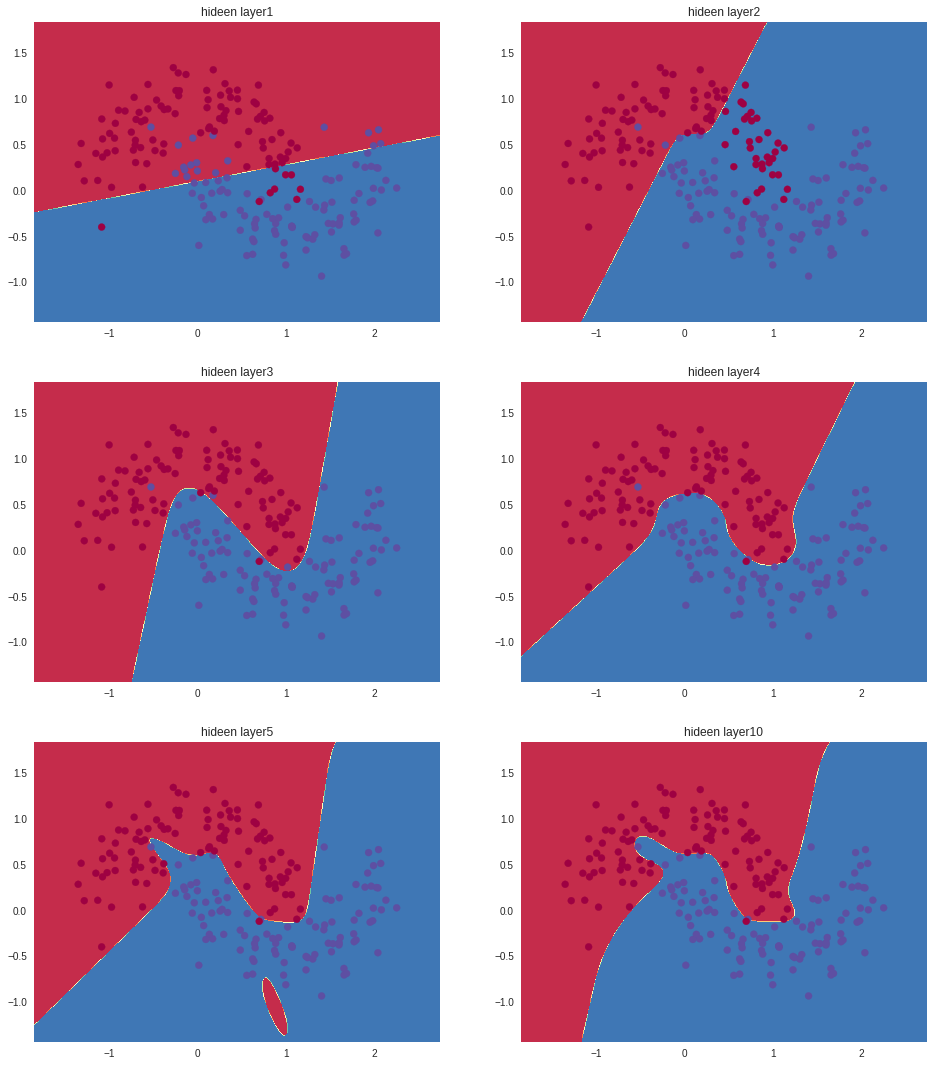

In [11]:
plt.figure(figsize=(16,32))
hdim = [1,2,3,4,5,10]
for i,nn_hdim in enumerate (hdim):
    plt.subplot(5,2,i+1)
    plt.title('hideen layer%d'%nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x:predict(model,x))
plt.show()

Text(0.5,1,u'decision boundary hidden layer 3')

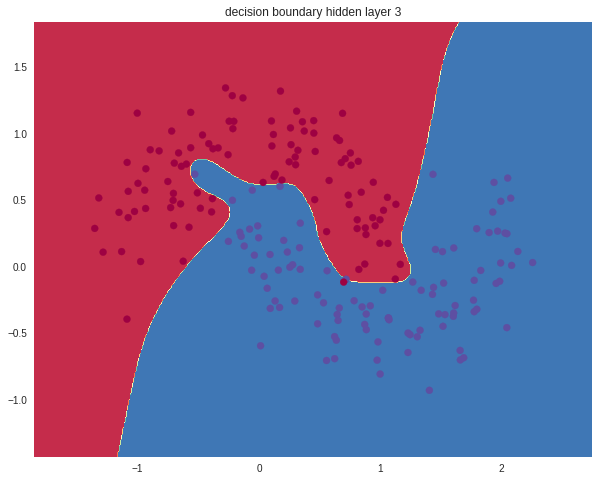

In [12]:
plot_decision_boundary(lambda x:predict(model,x))
plt.title("decision boundary hidden layer 3")